In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits # loading predefined sklearn datasets

### link -- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [2]:
# Load the dataset and identify which dataset is it!!
digits = load_digits()

In [3]:
dir(digits) ## In the directory it has some information

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0] ## we got an image which is represented in an array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

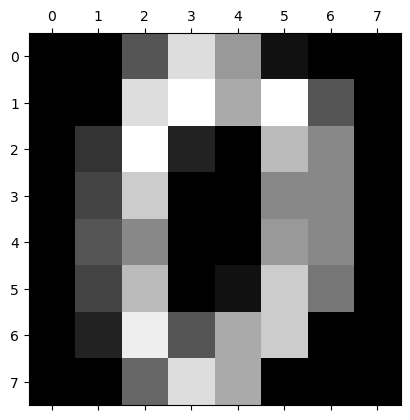

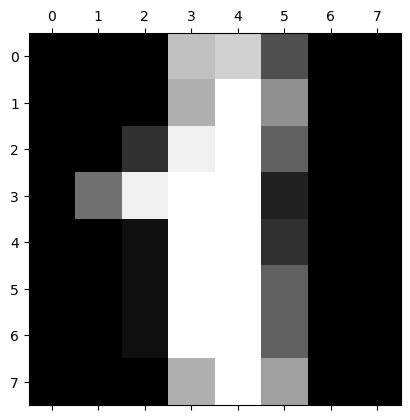

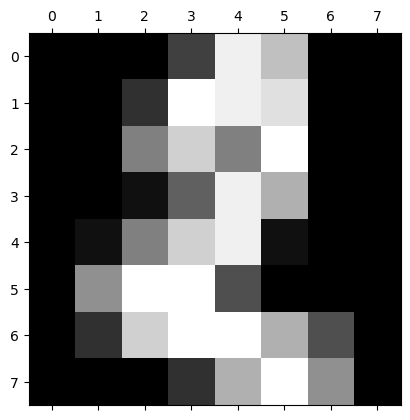

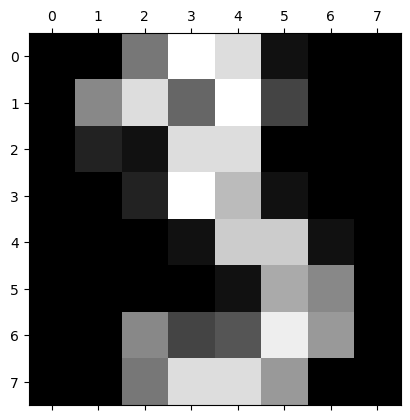

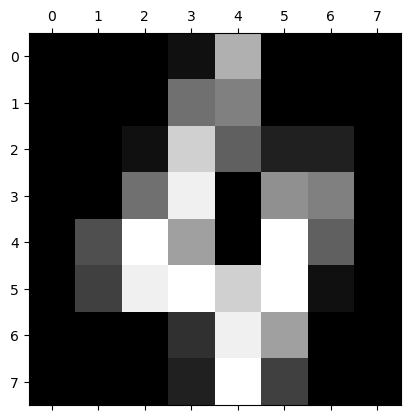

In [5]:
## For seeing the element
## use matplotlib
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i]) ## we got the images from 0 to 4

In [6]:
## what is target and target_names
digits.target[0:5] # it prints the image values
## We can use data and target to train our models

array([0, 1, 2, 3, 4])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.target[0]

0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [11]:
len(X_train)

1437

In [12]:
len(X_test)

360

In [13]:
X_train[0] ## Checking what is in the place of 0th index, we have image array value

array([ 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  5., 13.,  5.,  7.,
       13.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
        0.,  5., 14., 14.,  8.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  2.,
        0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
        3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.])

In [14]:
y_train[0] ## checking the 0th index value, we have number 6

7

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.score(X_test,y_test) ##96% accuracy

0.9583333333333334

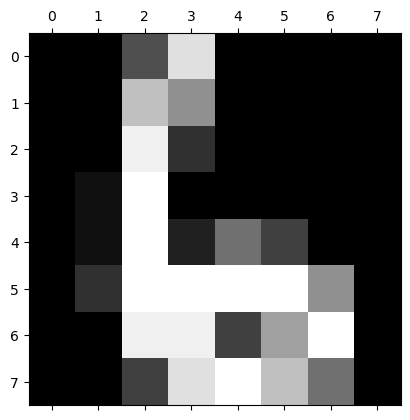

In [18]:
plt.matshow(digits.images[67]) ## picking a random sample and plotting it

In [19]:
digits.target[67]

6

In [20]:
## lets see what our model will predict
model.predict(digits.data[[67]]) # we got the correct answer as 6

array([6])

In [21]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### we got 96% of accuracy, and remaining 4% is not!!, we have to figure it out
### for that we can use the confusion matrix

In [22]:
## get the predicted values
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

## In the confusion matrix, we provided y_test which is our true value and y_predicted which is done by the model
cm = confusion_matrix(y_test, y_predicted)
cm


array([[34,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  2, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  1, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

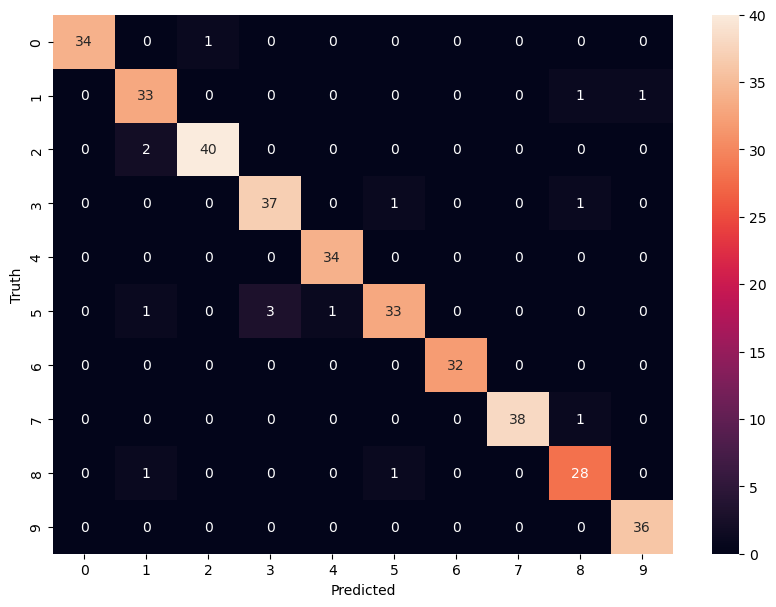

In [23]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## we got the confusition matrix